In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.markers as mmark

plt.rcParams['figure.dpi'] = 85
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 4.32
plt.rcParams['ytick.minor.size'] = 2.46
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['ytick.minor.width'] = 1.2
plt.rcParams['figure.dpi'] = 85

# Figure 10: Plot the bias consistency check
### Define some global variables

In [2]:
home = '/oak/stanford/orgs/kipac/users/mahlet/bias/'

In [3]:
z_array = [0, 0.5, 1, 1.5]

cmap_red = plt.get_cmap('Reds')(np.linspace(0.333, 0.999, 4))
cmap_blue = plt.get_cmap('Blues')(np.linspace(0.333, 0.999, 4))
cmap_total = plt.get_cmap('Purples')(np.linspace(0.333, 0.999, 4))
color_red = cmap_red[1] 
color_blue = cmap_blue[1]
color_total = cmap_total[1] 

In [4]:
Lbox = 205

In [5]:
cmap_tng = plt.get_cmap('Oranges')(np.linspace(0.333, 0.999, 4))
cmap_um = plt.get_cmap('Greens')(np.linspace(0.333, 0.999, 4))

### Define a function

In [6]:
def error_kmax(hodtype, z, color, density, Lbox = Lbox):

    invmats = np.load(home + 'data/mpiinvmat_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z, color, density))
    nbar = np.load(home + 'data/mpinbar_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z,color, density))
    covvals = invmats.real/nbar/Lbox**3  # divided by 2pi/dk is the same as times dx

    return [np.sqrt(np.diag(i)) for i in covvals]

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_30236/1129032518.py:16: SyntaxWarning: invalid escape sequence '\m'
  for color, i, title, ylim in zip(['red', 'blue', 'total'], range(len(i_idx)), ['\mathrm{Quenched}', '\mathrm{Star-Forming}',
/tmp/ipykernel_30236/1129032518.py:16: SyntaxWarning: invalid escape sequenc

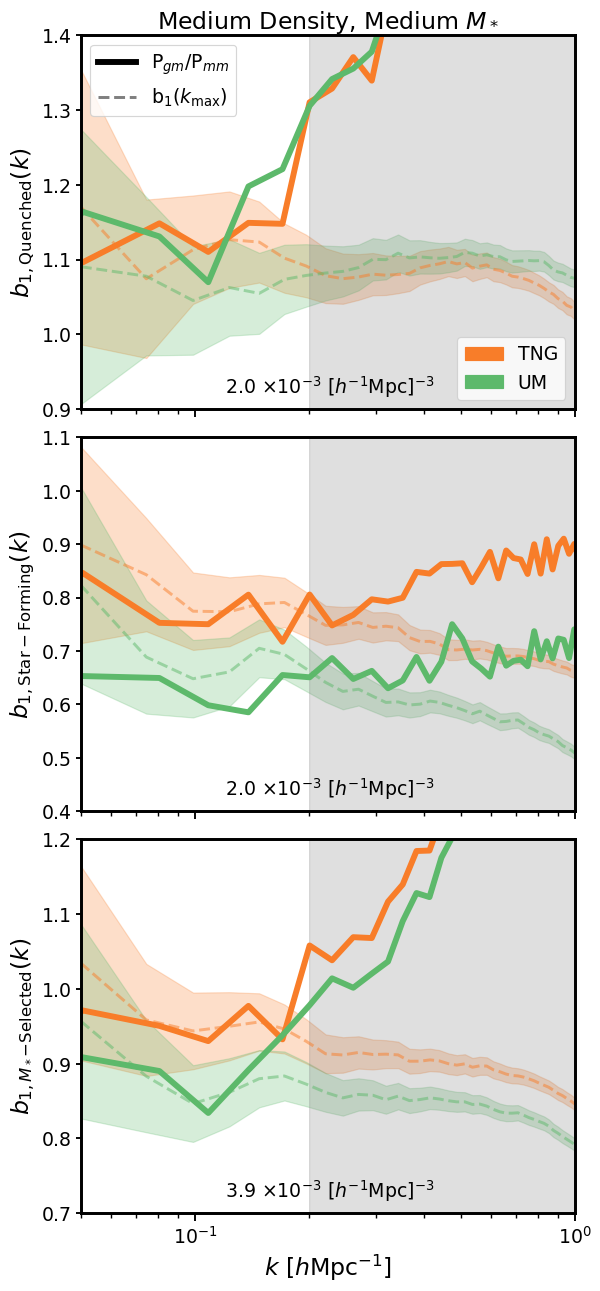

In [7]:
z = 1
colors = [cmap_tng[1], cmap_um[1]]
Nmesh = 1250
hodtypes = ['TNG', 'UM']
    
fig = plt.figure(figsize = (7.5,18))
grid = gridspec.GridSpec(3, 1)  
grid.update(wspace = 0.075, hspace = 0.075)
cuts = [[5e-4, 2e-3, 3.4e-3], [5e-4, 2e-3, 3.4e-3], [1e-3, 3.9e-3, 6.8e-3]]
k1_idx = np.load(home + 'data/k1_idx.npy')  
i_idx = [0,1,2]
density, j = 'medium', 1
ylims = dict()
ylims['medium'] = [[0.9, 1.4], [0.4, 1.1], [0.7, 1.2]]

for color, i, title, ylim in zip(['red', 'blue', 'total'], range(len(i_idx)), ['\mathrm{Quenched}', '\mathrm{Star-Forming}', 
                                                                               r'M_*\mathrm{-Selected}'], ylims[density]):    
    
    grid0 = plt.subplot(grid[i])

    perr, nbar, biasval, bias = {'TNG':[], 'UM':[]}, {'TNG':[], 'UM':[]}, {'TNG':[], 'UM':[]}, {'TNG':[], 'UM':[]}
    for hodtype, linestyle, alpha, linewidth, plot_color, k in zip(hodtypes, ['-','--'], [1, 0.75], [5, 2.5], 
                                                                   colors, [0, 1]):

        kvals_file = home+'data/kvals_'+color+'_'+hodtype+'_'+density+'_'+str(Nmesh)+'_z0'
        lin_pk_file = home+'data/lin_pk_'+color+'_'+hodtype+'_'+density+'_'+str(Nmesh)+'_z'+str(z)
        yerr = np.array(error_kmax(hodtype, z, color, density)).T

        kvals = np.load(kvals_file+'_gal_k.npy')
        biasval[hodtype] = np.load(lin_pk_file+'_biasval2_2.npy') # this file is obtained by running mpi_ksum script

        bias[hodtype] = np.load(home+'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+density+'.npy')
        kmax = np.load(home + 'data/mpikmax_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+density+'.npy')

        grid0.plot(kvals, biasval[hodtype], color = colors[k])
        grid0.plot(kmax, bias[hodtype][:,0], linewidth = 2.5, alpha = 0.5, linestyle = '--', color = colors[k])
        grid0.fill_between(kmax, y1 = bias[hodtype][:,0]-yerr[0], y2 = bias[hodtype][:,0]+yerr[0], color = colors[k], alpha = 0.25)

    grid0.fill_between(kvals[k1_idx:], -2, 3, color = 'grey', alpha = 0.25)
    grid0.set_ylim(ylim) 
    if i == 0:
        if density == 'low':
            grid0.set_title('Low Density, High M$\star$')
        elif density == 'medium':
            grid0.set_title('Medium Density, Medium $M_*$')
        else:
            grid0.set_title('High Density, Low M$\star$')
   
    grid0.text(x = 1.2e-1, y = ylim[0]+np.diff(ylim)*0.025/0.6, s='{:.1e}'.format(cuts[i][j])[:3]+r' $\times10^{{-'+'{:.1e}'.format(cuts[i][j])[-1]+'}}$ $[h^{{-1}}\mathrm{{Mpc}}]^{{-3}}$', fontsize = 16)
    grid0.set_xlim(kmax[0], 1)
    grid0.set_xscale('log')
    
    # labels
    grid0.set_ylabel(r'$b_{1, '+title+'}(k)$')
    if i==2:
        grid0.set_xlabel('$k$ $[h\mathrm{Mpc}^{-1}$]')
    else:
        grid0.tick_params(axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=True,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

    if i==0:
        patch = [mpatches.Patch(color=colors[i], label=hodtypes[i]) for i in range(len(hodtypes))]
        first_legend = grid0.legend(handles=patch, loc = 'lower right')
        grid0.add_artist(first_legend)
    
        custom_lines = [Line2D([0], [0], color = 'black', linewidth = 5, linestyle = '-'), 
                        Line2D([0], [0], color = 'black', linewidth = 2.5, alpha = 0.5, linestyle = '--')]
        grid0.legend(custom_lines, ['P$_{gm}$/P$_{mm}$', 'b$_1(k_\mathrm{max}$)'], loc = 'upper left')

plt.savefig(home + 'figures/Figure10.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Figure 11: Plot the bias parameters a function of $k_\mathrm{max}$

<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_30236/2780344968.py:42: SyntaxWarning: invalid escape sequence '\m'
  grid0.set_xlabel('$k_\mathrm{max}$ $[h\mathrm{Mpc}^{-1}]$')
/tmp/ipykernel_30236/2780344968.py:52: SyntaxWarning: invalid escape sequence '\s'
  grid0.set_title('Low Density, High M$\star$')
/tmp/ipykernel_30236/2780344968.py:56: SyntaxWarning: invalid escape sequence '\s'
  grid0.set_title('High Density, Low M$\star$')


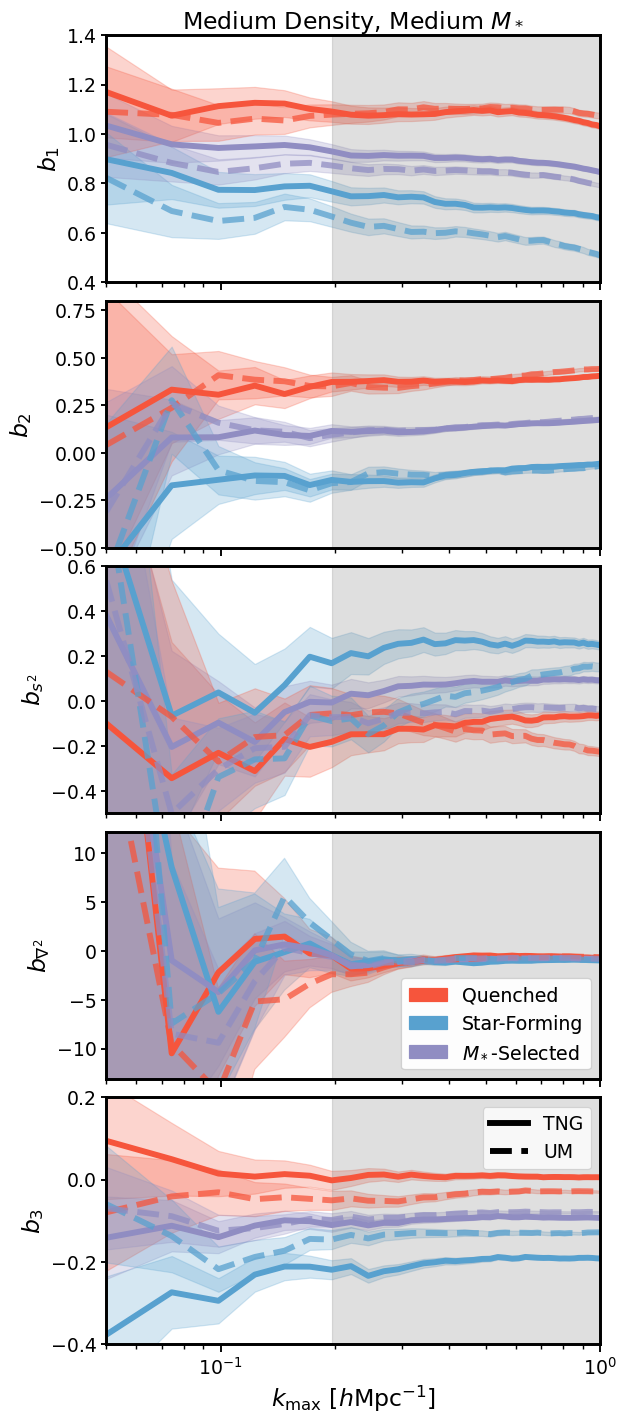

In [8]:
z = 1
loc = 'upper right'
colors = [color_red, color_blue, color_total]
hodtypes = ['TNG', 'UM']

plt.figure(figsize = (7.5,20))
grid = gridspec.GridSpec(5, 1)  
grid.update(wspace = 0.075, hspace = 0.075)
j = 0
cuts = [8.3e-4, 3.3e-3, 5.7e-3, 1.7e-4, 6.5e-4, 1.1e-3, 1.0e-3, 3.9e-3, 6.8e-3] 
k1_idx = np.load(home + 'data/k1_idx.npy') 
labels = ['$b_1$', '$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
labels_new = ['Quenched', 'Star-Forming', '$M_*$-Selected']
hodtypes = ['TNG', 'UM']
density = 'medium'
ylims = dict()
ylims['medium'] = [[0.4, 1.4], [-0.5, 0.8], [-0.5, 0.6], [-13.1, 12.2], [-0.4, 0.2]] 

for ylabel, j, ylim in zip(labels, range(len(labels)), ylims[density]):

    grid0 = plt.subplot(grid[j]) 

    biasval = {'TNG':[], 'UM':[]}
    for hodtype, linestyle, alpha in zip(hodtypes, ['-','--'], [1, 0.75]):
        
        for color, c in zip(['red', 'blue', 'total'], colors):

            yerr = np.array(error_kmax(hodtype, z, color, density)).T[j]

            biasval[hodtype] = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+
                                   density+'.npy')
            kmax = np.load(home + 'data/mpikmax_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_'+color+'_'+density+'.npy')
        
            grid0.plot(kmax, biasval[hodtype].T[j], color = c, linestyle = linestyle, alpha = alpha) 
            grid0.fill_between(kmax, y1 = biasval[hodtype].T[j]-yerr, y2 = biasval[hodtype].T[j]+yerr, color = c, alpha = 0.25)

    grid0.set_ylabel(ylabel)
    grid0.set_xscale('log')
    grid0.set_xlim(np.min(kmax), kmax[-1])
    grid0.set_ylim(ylim)
    if j>=4:
        grid0.set_xlabel('$k_\mathrm{max}$ $[h\mathrm{Mpc}^{-1}]$')
    else:
        grid0.set_xticklabels([])
        grid0.tick_params(axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=True,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off
    if j==0:
        if density == 'low':
            grid0.set_title('Low Density, High M$\star$')
        elif density == 'medium':
            grid0.set_title('Medium Density, Medium $M_*$')
        else:
            grid0.set_title('High Density, Low M$\star$')

    grid0.fill_between(kmax[k1_idx:], ylim[0], ylim[1], color = 'grey', alpha = 0.25) 

    if j == 3:
        patch = [mpatches.Patch(color=colors[i], label=labels_new[i]) for i in range(len(labels_new))] 
        first_legend = grid0.legend(handles=patch, loc = 'lower right')
        grid0.add_artist(first_legend)

custom_lines = [Line2D([0], [0], color = 'black', linewidth = 5, linestyle = '-'), 
                Line2D([0], [0], color = 'black', linewidth = 5, linestyle = '--', alpha = 1)]
grid0.legend(custom_lines, hodtypes, loc = loc)

plt.savefig(home + 'figures/Figure11.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Figure 12: Plot quenched vs star-forming
### Define a function

In [9]:
def error(hodtype, z, color, density, AB = ''):

    invmats = np.load(home + 'data/'+AB+'mpiinvmat_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z, color, density))
    nbar = np.load(home + 'data/'+AB+'mpinbar_%shod_z%s_Ndown1_nbias5_%s_%s.npy'%(hodtype, z,color, density))
    covvals = invmats.real[k1_idx]/nbar/Lbox**3  # divided by 2pi/dk is the same as times dx

    return np.sqrt(np.diag(covvals))

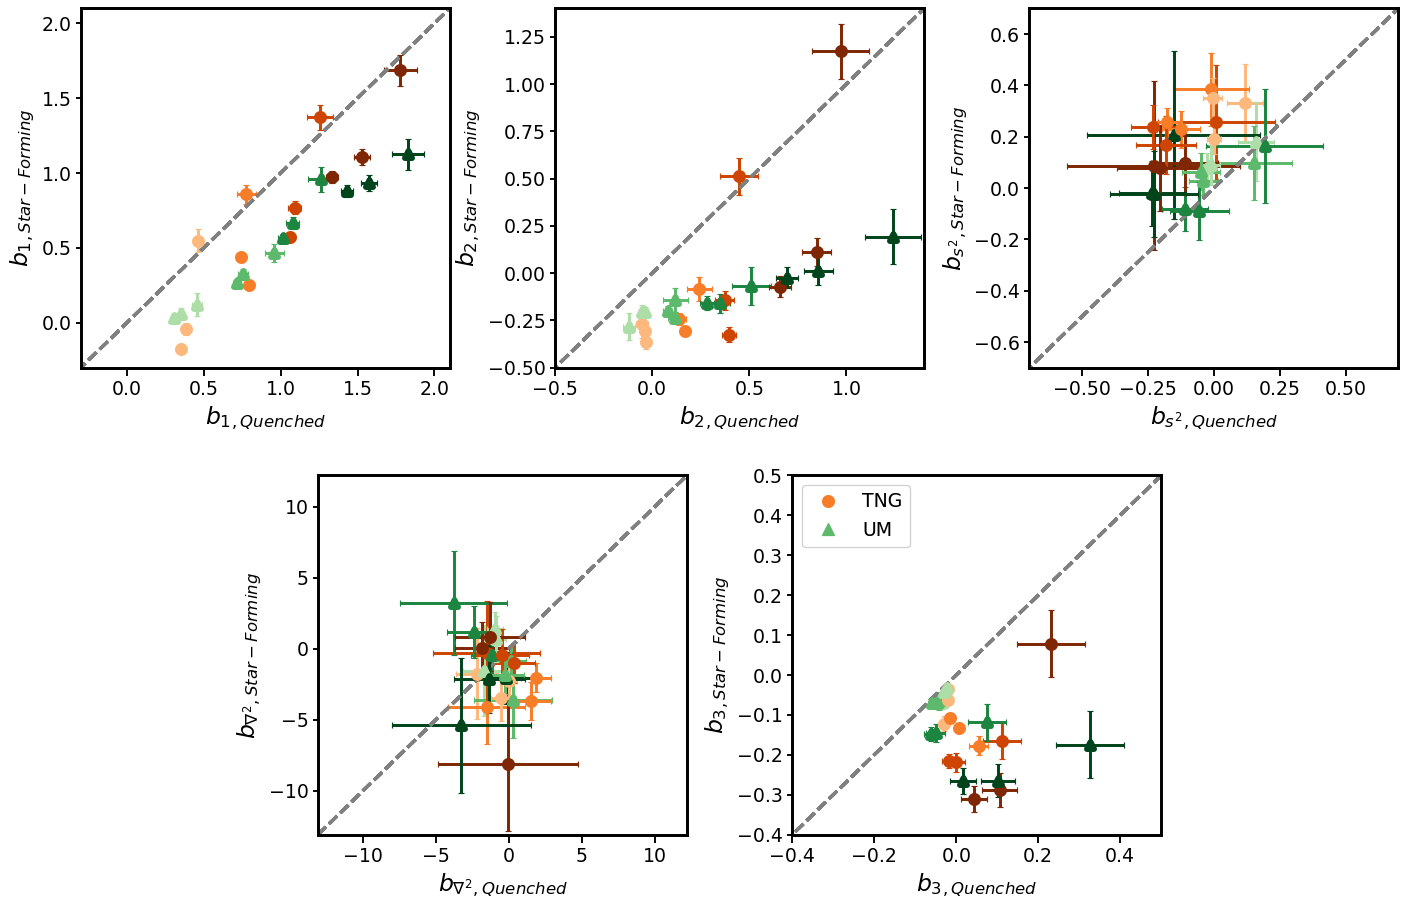

In [10]:
k1_idx = np.load(home + 'data/k1_idx.npy')
colors_patch = ['red', 'blue', 'purple']
labels = ['Quenched', 'Star-Forming', 'Total']
hodtypes = ['TNG', 'UM', r'$-\frac{2}{7}(b_1-1)$', 'Barreira+ (2021)']
cmap_patch = [cmap_red, cmap_blue, cmap_total]
colors_cmap_patch = [color_red, color_blue, color_total] 

fig = plt.figure(figsize = (20,9)) 
grid = gridspec.GridSpec(2, 6) 
grid.update(wspace = 0.8, hspace = 0.3, bottom = -0.2) 
 
ax1 = plt.subplot(grid[0, 0:2])
ax2 = plt.subplot(grid[0, 2:4])
ax3 = plt.subplot(grid[0, 4:6])
ax4 = plt.subplot(grid[1, 1:3])
ax5 = plt.subplot(grid[1, 3:5])
axlist = [ax1, ax2, ax3, ax4, ax5] #https://www.geeksforgeeks.org/matplotlib-gridspec-gridspec-class-in-python/

ylabel = ['$b_1$', '$b_2$', '$b_{s^2}$', r'$b_{\nabla^2}$', '$b_3$']
line = np.linspace(-13.1, 12.2)
for i, ylim, ax in zip(range(len(ylabel)), [(-0.3, 2.1), (-0.5, 1.4), (-0.7, 0.7), (-13.1, 12.2), (-0.4, 0.5)], axlist):
                
    for density in ['low', 'high', 'medium']:

        for z, j in zip(z_array, range(len(z_array))):

            for marker, hodtype, cmap in zip(['o','^'], hodtypes, [cmap_tng, cmap_um]):

                biasval_red = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_red_'+
                                  density+'.npy')
                biasval_blue = np.load(home + 'data/mpibiasval_'+hodtype+'hod_z'+str(z)+'_Ndown1_nbias5_blue_'+
                                  density+'.npy')

                # load error bars
                err_x = error(hodtype, z, 'red', density)
                err_y = error(hodtype, z, 'blue', density)
            
                ax.scatter(biasval_red[:,i][k1_idx], biasval_blue[:,i][k1_idx], marker = marker, color = cmap[j],
                              linewidth = 5, zorder = 3) 
                ax.plot(line, line, linewidth = 2.5, linestyle = '--', color = 'grey')
                ax.errorbar(biasval_red[:,i][k1_idx], biasval_blue[:,i][k1_idx], xerr = err_x[i], yerr = err_y[i], marker = marker,
                                   fmt = 'none', elinewidth = 2.5, capsize = 2.5, color = cmap[j])
                
            ax.set_ylabel(ylabel[i]+'$_{, Star-Forming}$')
            ax.set_xlim(ylim)
            ax.set_ylim(ylim)
        
    ax.set_xlabel(ylabel[i] + '$_{, Quenched}$')
    
ax.plot(np.linspace(-1,8), np.linspace(-1,8), linestyle = '--', linewidth = 2.5, color = 'grey')

custom_lines = [Line2D([0], [0], color = cmap_tng[1], markersize = 10, marker = 'o', linestyle = 'None'), 
                Line2D([0], [0], color = cmap_um[1], markersize = 10, marker = '^', linestyle = 'None')]
second_legend = plt.legend(custom_lines, hodtypes, loc = 'upper left')
fig.add_artist(second_legend)
        
plt.savefig(home + 'figures/Figure12.pdf', dpi = 300, bbox_inches='tight')
plt.show()